In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from wordcloud import WordCloud

#A word cloud is a technique to show which words are the most frequent in the given text.

In [3]:
data = pd.read_csv(r"C:\Users\CTTC\Downloads\Datasets\Spam.csv",encoding='ISO-8859-1')

#the 'encoding' is used to specify the format of data encoded in the text file
#it simplifies decoding and reading of the files
#ISO-Indian Standard Organization
#by default the encoding format is 'UTF-8'->Unicode Transformation Format-8 bytes
#Most libraries that don't hold a lot of foreign language materials will be perfectly fine with ISO8859-1 
#Also called Latin-1 or extended ASCII encoding format
#But if you do have a lot of foreign language materials you should choose UTF-8 
#Since that provides access to a lot more foreign characters.

In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
data

#dropping the NULL columns; else we can also used the 'inplace' command and no need to assign values

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
#renaming the original columns
data.columns = ['Labels','Data']
data

,Labels,Data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
data['df_Labels'] = data['Labels'].map({'ham':0,'spam':1})
y = data['df_Labels'].values
y

#makes changes in a sequence(list,dictionary,set,tuple),then no need to use loops
#here each 'ham' instance would be labelled as 0, while each 'spam' instance would be labelled as 1
#'y' is used to stored the 'Labels' column

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
#ip/op creation

ip=data['Data']
op=y

In [10]:
ip.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Data, dtype: object

In [11]:
op

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
#train test split

from sklearn.model_selection import train_test_split
df_train, df_test, Ytrain, Ytest = train_test_split(ip, op, test_size=0.33)

#split the training and testing data from the input and output

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#TfidfVectorizer -> Convert a collection of raw documents to a matrix of TF-IDF features
#TfidfTransformer -> Performs the TF-IDF transformation from a provided matrix of counts



from sklearn.naive_bayes import MultinomialNB

#Naive Bayes classifier for multinomial models, that plots multinomial distribution
#The multinomial Naive Bayes classifier is suitable for classification with discrete features and text data
# e.g., word counts for text classification. 
#The multinomial distribution normally requires integer feature counts. 
#However, in practice, fractional counts such as tf-idf may also work.

In [14]:
tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test)

#while decoding if any error occurs, mismatching and missing values, it will be ignored
#by default 'decode_error' is 'strict'

In [15]:
#model training

model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9726761317974819
test score: 0.9613920609026645


In [16]:
#visualise the data 

def visualize(label):
    words=''
    for msg in data[data['Labels']==label]['Data']:
        msg.lower()
        words+=msg+''
    wcld= WordCloud(width=600,height=400).generate(words)
    plt.imshow(wcld)
    plt.axis('off')
    plt.show()

#'imshow' is used to plot images on the graph
#'axis-off' removes the x and y ticks from the plot
#'df[df['Labels']==lables]['data']' states that every instance of label given as argument to the function is to be stored and added to 'words'
#"words+=msg+''" states that the 'msg' is to be added to 'words' and then a space is added to it
#'(width=600,height=400)' states the plotting size of the wordmap plot
#'.generate(words)' generates plot from the 'WordCloud' package, with the argument 'words'

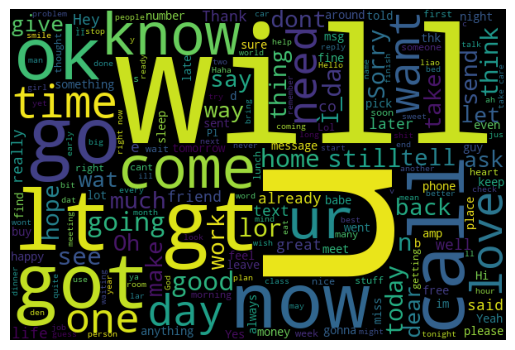

In [17]:
visualize('ham')

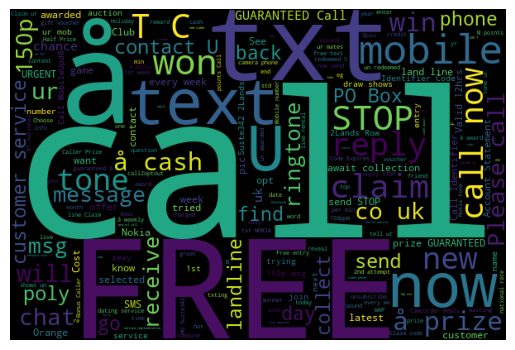

In [18]:
visualize('spam')